<a href="https://colab.research.google.com/github/hamydang16/Data-Analysis/blob/main/Data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
#add when combine
from scipy.stats import bootstrap, mannwhitneyu

import warnings
warnings.filterwarnings('ignore')

In [151]:
#display option
pd.options.display.float_format = '{:,.2f}'.format

In [152]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import data

In [153]:
#import data
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Ask A Manager Salary Survey 2021 (Responses).xlsx')

# Initial data cleaning

In [154]:
#basic info
df.head()

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,2021-04-27 11:02:09.743,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.00,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,2021-04-27 11:02:21.562,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,"4,000.00",GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,2021-04-27 11:02:38.125,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,2021-04-27 11:02:40.643,25-34,Nonprofits,Program Manager,NaN,62000,"3,000.00",USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,2021-04-27 11:02:41.793,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,"7,000.00",USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28046 entries, 0 to 28045
Data columns (total 18 columns):
 #   Column                                                                                                                                                                                                                                Non-Null Count  Dtype         
---  ------                                                                                                                                                                                                                                --------------  -----         
 0   Timestamp                                                                                                                                                                                                                             28046 non-null  datetime64[ns]
 1   How old are you?                                                                        

In [156]:
df.describe()

,Timestamp,"What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits."
count,28046,"28,046.00","20,758.00"
mean,2021-05-14 05:03:42.304699136,"147,619.36","18,167.57"
min,2021-04-27 11:02:09.743000,0.00,0.00
25%,2021-04-27 14:21:21.677500160,"54,000.00",0.00
50%,2021-04-28 13:56:13.594000128,"75,000.00","2,000.00"
75%,2021-04-29 20:15:03.869000192,"110,000.00","10,000.00"
max,2024-06-05 02:38:39.491000,"870,000,000.00","120,000,000.00"
std,NaN,"5,409,611.69","834,213.78"


In [157]:
df.shape

(28046, 18)

## Duplicate

In [158]:
df[df.duplicated()]

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)


## Clean column name

In [159]:
df.columns

Index(['Timestamp', 'How old are you?', 'What industry do you work in?',
       'Job title',
       'If your job title needs additional context, please clarify here:',
       'What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)',
       'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.',
       'Please indicate the currency',
       'If "Other," please indicate the currency here: ',
       'If your income needs additional context, please provide it here:',
       'What country do you work in?',
       'If you're in the U.S., what state do you work in?',
       'What city do you work in?',
       'How many years of professional work experience do you have overall?',
       

In [160]:
new_col_names = ['Timestamp', 'Age range', 'Industry',
       'Job title',
       'Job title context',
       'Annual salary',
       'Additional monetary compensation',
       'Currency',
       'Other currency',
       'Income additional context',
       'Country',
       'State',
       'City',
       'YOE (Overall)',
       'YOE (Field)',
       'Eduacation (Highest complete)',
       'Gender', 'Race']

In [161]:
#rename columns that are too long
df.columns = new_col_names

In [162]:
df.head()

,Timestamp,Age range,Industry,Job title,Job title context,Annual salary,Additional monetary compensation,Currency,Other currency,Income additional context,Country,State,City,YOE (Overall),YOE (Field),Eduacation (Highest complete),Gender,Race
0,2021-04-27 11:02:09.743,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.00,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,2021-04-27 11:02:21.562,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,"4,000.00",GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,2021-04-27 11:02:38.125,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,2021-04-27 11:02:40.643,25-34,Nonprofits,Program Manager,NaN,62000,"3,000.00",USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,2021-04-27 11:02:41.793,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,"7,000.00",USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


## Clean values of columns

### Age range

In [163]:
df['Age range'].value_counts()

,count
Age range,
25-34,12649
35-44,9895
45-54,3188
18-24,1214
55-64,992
65 or over,94
under 18,14


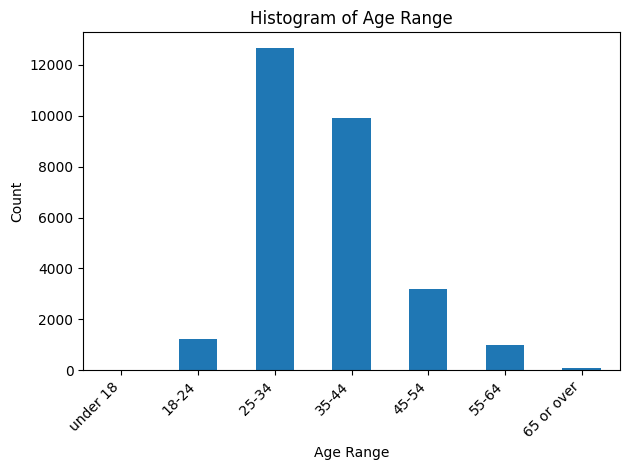

In [164]:
#order of category
category_order = ['under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65 or over']
# Create the histogram
df['Age range'].value_counts().loc[category_order].plot(kind='bar')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Histogram of Age Range')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

### Industry

In [165]:
#reduce to lower case
df['Industry'] = df['Industry'].str.lower()
#remove white space
df['Industry'] = df['Industry'].str.strip()

In [166]:
#Group the non-top 25 industries into others
df['Industry'] = df['Industry'].apply(lambda x: 'Others' if x not in df['Industry'].value_counts().head(25).index else x)

In [167]:
df['Industry'].value_counts()

,count
Industry,
computing or tech,4694
education (higher education),2463
nonprofits,2418
Others,2289
health care,1894
government and public administration,1889
"accounting, banking & finance",1804
engineering or manufacturing,1694
"marketing, advertising & pr",1133


### Job title

In [168]:
df['Job title'].str.lower().value_counts()

,count
Job title,
software engineer,356
project manager,262
senior software engineer,231
director,202
program manager,183
...,...
organized play associate,1
mobile software engineer,1
technologist,1


In [169]:
#reduce to lower case
df['Job title'] = df['Job title'].str.lower()
#remove white space
df['Job title'] = df['Job title'].str.strip()

In [170]:
df[~df['Job title'].duplicated()]

,Timestamp,Age range,Industry,Job title,Job title context,Annual salary,Additional monetary compensation,Currency,Other currency,Income additional context,Country,State,City,YOE (Overall),YOE (Field),Eduacation (Highest complete),Gender,Race
0,2021-04-27 11:02:09.743,25-34,education (higher education),research and instruction librarian,NaN,55000,0.00,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,2021-04-27 11:02:21.562,25-34,computing or tech,change & internal communications manager,NaN,54600,"4,000.00",GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,2021-04-27 11:02:38.125,25-34,"accounting, banking & finance",marketing specialist,NaN,34000,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,2021-04-27 11:02:40.643,25-34,nonprofits,program manager,NaN,62000,"3,000.00",USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,2021-04-27 11:02:41.793,25-34,"accounting, banking & finance",accounting manager,NaN,60000,"7,000.00",USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28033,2024-04-16 19:21:36.959,18-24,health care,health informatics,NaN,35000,"1,700.00",CAD,NaN,NaN,Canada,NaN,Toronto,1 year or less,1 year or less,College degree,Man,Asian or Asian American
28036,2024-04-25 09:22:29.866,35-44,"accounting, banking & finance",dba,LORD,1000,100.00,USD,NaN,100,LOUTRELAND,NaN,LOUTRECITY,41 years or more,41 years or more,Some college,Other or prefer not to answer,Another option not listed here or prefer not t...
28039,2024-05-09 11:23:19.767,25-34,computing or tech,digital content developer,I develop web and email content for consumers ...,80000,"6,000.00",USD,NaN,NaN,USA,Minnesota,Minneapolis,8 - 10 years,5-7 years,College degree,Woman,Asian or Asian American
28043,2024-05-27 02:47:25.934,25-34,computing or tech,lead,NaN,2600000,NaN,USD,NaN,NaN,USA,Florida,Newyork,8 - 10 years,2 - 4 years,NaN,Man,NaN


### Annual salary + other comp

In [171]:
df[['Annual salary', 'Additional monetary compensation']].describe()

,Annual salary,Additional monetary compensation
count,"28,046.00","20,758.00"
mean,"147,619.36","18,167.57"
std,"5,409,611.69","834,213.78"
min,0.00,0.00
25%,"54,000.00",0.00
50%,"75,000.00","2,000.00"
75%,"110,000.00","10,000.00"
max,"870,000,000.00","120,000,000.00"


In [172]:
df[['Annual salary', 'Additional monetary compensation']].isnull().sum()

,0
Annual salary,0
Additional monetary compensation,7288


### Currency

In [173]:
df['Currency'].value_counts()

,count
Currency,
USD,23365
CAD,1670
GBP,1591
EUR,641
AUD/NZD,504
Other,158
CHF,37
SEK,37
JPY,23


In [174]:
df['Currency'].count()

28046

In [175]:
df['Other currency'].isna().sum()

27843

In [176]:
#df['Other currency'] = df['Other currency'].fillna(df['Currency'])

In [177]:
df['Other currency'].value_counts()

,count
Other currency,
USD,11
INR,10
NOK,10
SGD,10
MYR,8
...,...
US Dollar,1
AUD & NZD are not the same currency...,1
55000,1


In [178]:
#replace other in currency with the value in 'other currency' column
df['Currency'] = np.where(df['Currency'] == 'Other', df['Other currency'], df['Currency'])

In [179]:
df['Currency'] = df['Currency'].str.strip()

In [180]:
#create dictionary to replace
currency_dict = {
  'Euro': 'EUR',
  'Australian Dollars': 'AUD/NZD',
  'American Dollars': 'USD',
  'AUD Australian': 'AUD/NZD'
}
#replace with dict
df['Currency'].replace(currency_dict, inplace=True)

In [181]:
#Show count=1
value_counts = df['Currency'].value_counts()
industries_with_count_one = value_counts[value_counts == 1].index
#df[(df['Currency'].isin(industries_with_count_one))]['Currency'].value_counts()
#drop all rows where currency value count is 1
df = df[~df['Currency'].isin(industries_with_count_one)]

In [182]:
#Uppercase of currency
df['Currency'] = df['Currency'].str.upper()

### Country, State, City

In [183]:
df.head()

,Timestamp,Age range,Industry,Job title,Job title context,Annual salary,Additional monetary compensation,Currency,Other currency,Income additional context,Country,State,City,YOE (Overall),YOE (Field),Eduacation (Highest complete),Gender,Race
0,2021-04-27 11:02:09.743,25-34,education (higher education),research and instruction librarian,NaN,55000,0.00,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,2021-04-27 11:02:21.562,25-34,computing or tech,change & internal communications manager,NaN,54600,"4,000.00",GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,2021-04-27 11:02:38.125,25-34,"accounting, banking & finance",marketing specialist,NaN,34000,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,2021-04-27 11:02:40.643,25-34,nonprofits,program manager,NaN,62000,"3,000.00",USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,2021-04-27 11:02:41.793,25-34,"accounting, banking & finance",accounting manager,NaN,60000,"7,000.00",USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


In [184]:
#reduce to lower case
df['Country'] = df['Country'].str.lower()
#remove white space
df['Country'] = df['Country'].str.strip()

In [185]:
#reduce to lower case
df['State'] = df['State'].str.lower()
#remove white space
df['State'] = df['State'].str.strip()

In [186]:
df['Country'].value_counts()

,count
Country,
united states,10011
usa,9050
us,2777
canada,1676
uk,692
...,...
danmark,1
u.k. (northern england),1
u.k,1


In [187]:
#List of different spelling of united states
rename_usa = df[df['Country'].str.contains('united st')]['Country'].value_counts().index.to_list()
#replace with united states
df['Country'] = df['Country'].apply(lambda x: 'united states' if x in rename_usa else x)


In [188]:
#List of different spelling of united states 2
rename_usa_2 = ['usa', 'us', 'u.s.', 'u.s.a.','u.s', 'unites states', 'u.s.a', 'u. s.', 'united sates',
       'unitedstates', 'unite states', 'usa tomorrow',
       'united sates of america', 'united y',
       'uniter statez', 'usab', 'usa, but for foreign gov''t',
       'unitied states', 'usd', 'u. s',
       'us govt employee overseas, country withheld',
       'usat', 'unitef stated', 'ua',
       'usa (company is based in a us territory, i work remote)', 'usaa',
       'untied states', 'u.s>',
       'usa-- virgin islands', 'uniited states', 'unted states', 'uniyed states', 'uniyes states', 'u.a.', 'us of a', 'u.sa', 'united kindom', 'uxz', 'uss',
       'uniteed states', 'uk for u.s. company', 'united  states', 'the us']
#rename
df['Country'] = df['Country'].apply(lambda x: 'united states' if x in rename_usa_2 else x)


In [189]:
df[df['Country'].str.startswith('au')]['Country'].value_counts().index

Index(['australia', 'austria', 'australi',
       'austria, but i work remotely for a dutch/british company',
       'australian'],
      dtype='object', name='Country')

In [190]:
#List of different spelling of united kingdom
rename_uk = ['united kingdom', 'united kingdom (england)', 'united kingdom.', 'united kingdomk', 'uk', 'u.k.', 'uk (england)',
             'uk (northern ireland)', 'wales, uk', 'england/uk', 'wales (uk)', 'england, uk.', 'britain', 'northern ireland, united kingdom',
             'london', 'uk, but for globally fully remote company', 'u.k', 'englang', 'u.k. (northern england)', 'wales (united kingdom)', 'uk, remote',
             'england, gb','wales (united kingdom)']
df['Country'] = df['Country'].apply(lambda x: 'united kingdom' if x in rename_uk else x)

In [191]:
#List of different spelling of canada
rename_ca = ['canda', 'canada, ottawa, ontario', 'canadw', 'can', 'canada and usa', 'canad','canadá', 'csnada']
df['Country'] = df['Country'].apply(lambda x: 'canada' if x in rename_ca else x)

In [192]:
#List of different spelling of canada
rename_aus = ['australi','austria, but i work remotely for a dutch/british company','australian']
df['Country'] = df['Country'].apply(lambda x: 'australia' if x in rename_aus else x)

In [201]:
df['Country'].value_counts()

,count
Country,
united states,23145
canada,1685
united kingdom,1357
australia,392
germany,195
...,...
lithuania,2
remote,2
vietnam,2


In [194]:
#Show count=1
country_value_counts = df['Country'].value_counts()
country_with_count_one = country_value_counts[country_value_counts == 1].index
#df[(df['Currency'].isin(industries_with_count_one))]['Currency'].value_counts()
#drop all rows where currency value count is 1
df = df[~df['Country'].isin(country_with_count_one)]

In [195]:
df['State'].value_counts()

,count
State,
california,2606
new york,2171
massachusetts,1519
texas,1268
illinois,1212
...,...
"arizona, california, nevada, texas",1
"illinois, kentucky",1
"illinois, wisconsin",1


In [196]:
#Show count=1
state_value_counts = df['State'].value_counts()
state_with_count_one = state_value_counts[state_value_counts == 1].index
#df[(df['Currency'].isin(industries_with_count_one))]['Currency'].value_counts()
#drop all rows where currency value count is 1
#df = df[~df['Country'].isin(country_with_count_one)]
state_with_count_one

Index(['arizona, hawaii, illinois, michigan, utah, wyoming',
       'maryland, new york', 'district of columbia, washington',
       'louisiana, washington', 'california, new jersey', 'california, texas',
       'colorado, illinois', 'ohio, washington', 'indiana, ohio',
       'florida, georgia, south carolina', 'georgia, massachusetts',
       'arkansas, illinois', 'delaware, pennsylvania',
       'florida, new hampshire, wisconsin', 'illinois, north carolina',
       'indiana, massachusetts', 'alabama, oregon',
       'michigan, texas, washington', 'alabama, california',
       'california, illinois, massachusetts, north carolina, south carolina, virginia',
       'california, maryland', 'mississippi, missouri', 'new york, virginia',
       'oregon, washington',
       'california, district of columbia, illinois, iowa, maryland, minnesota',
       'texas, virginia', 'arizona, new york', 'california, new york',
       'iowa, nebraska', 'new york, oregon, vermont',
       'pennsylvania

In [197]:
#Extract DC separately
rename_dc = df[df['State'].str.count('of') == 1]['State'].value_counts().index
#rename
df['State'] = df['State'].apply(lambda x: 'district of columbia' if x in rename_dc else x)

In [198]:
#extract state that comes after a commna
rename_state = df[df['State'].str.count(',') == 1]['State'].value_counts().index
#rename
df['State'] = df['State'].apply(lambda x: x.split(',')[1].strip() if x in rename_state else x)

In [207]:
#remove state with value count = 1
state_value_counts = df['State'].value_counts()
state_with_count_one = state_value_counts[(state_value_counts == 1) | (state_value_counts ==2) ].index
#remove
df = df[~df['State'].isin(state_with_count_one)]

In [ ]:
#remove state with value count = 2
state_value_counts = df['State'].value_counts()
state_with_count_one = state_value_counts[state_value_counts == 2].index
#remove
df = df[~df['State'].isin(state_with_count_one)]

In [208]:
df['State'].value_counts()

,count
State,
california,2609
new york,2180
massachusetts,1522
texas,1270
illinois,1214
washington,1189
district of columbia,994
pennsylvania,949
virginia,791


In [212]:
df.shape
#

(27900, 18)